<h1> Unzip data into colab session

In [0]:
#unzipping here in colab session
#!unzip '/content/drive/My Drive/MonuSeg-20200317T123814Z-001.zip'

In [58]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [59]:
!pip install -U efficientnet==0.0.4

Requirement already up-to-date: efficientnet==0.0.4 in /usr/local/lib/python3.6/dist-packages (0.0.4)


In [0]:
%tensorflow_version 1.x

In [61]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [0]:
import numpy as np
import pandas as pd
import gc
import keras

import os
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

#import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split,StratifiedKFold

from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


import glob
import shutil
import os
import random
from PIL import Image

#seed = 10
#np.random.seed(seed)
#random.seed(seed)
#os.environ['PYTHONHASHSEED'] = str(seed)
#np.random.seed(seed)
#tf.random.set_seed(seed)

<h1> Load Data </h1>

In [0]:
im_width=512
im_height=512
depth = 3

In [64]:
# list of names all images in the given path
ids_train = next(os.walk("./MonuSeg/Training/TissueImages"))[2]
print("No. of images in training set= ", len(ids_train))

# list of names all images in the given path
ids_test = next(os.walk("./MonuSeg/Test/TissueImages"))[2]
print("No. of images in testing set = ", len(ids_test))

#train
X_train = np.zeros((len(ids_train), im_height, im_width, depth ), dtype=np.float32)
y_train = np.zeros((len(ids_train), im_height, im_width, depth), dtype=np.float32)

#test
X_test = np.zeros((len(ids_test), im_height, im_width, depth), dtype=np.float32)
y_test = np.zeros((len(ids_test), im_height, im_width, depth), dtype=np.float32)

#train

# tqdm is used to display the progress bar
for n, id_ in tqdm_notebook(enumerate(ids_train), total=len(ids_train)):
    # Load images
    img = load_img("MonuSeg/Training/TissueImages/"+id_, grayscale=True)
    x_img = img_to_array(img)
    x_img = resize(x_img, (im_width, im_height, depth), mode = 'constant', preserve_range = True)
    
    #rename mask
    d = id_.split('.')
    d[0] = d[0]+"_bin_mask."
    id_ = d[0]+d[1]
    #print(id_)
    #renamed becuase GT in filenames include _bin_mask in names
    
    # Load masks
    mask = img_to_array(load_img("MonuSeg/Training/GroundTruth/"+id_, grayscale=True))
    mask = resize(mask, (im_width, im_height, depth), mode = 'constant', preserve_range = True)
    # Save images
    X_train[n] = x_img/255.0
    y_train[n] = mask/255.0
    
    
    
#test

# tqdm is used to display the progress bar
for n, id_ in tqdm_notebook(enumerate(ids_test), total=len(ids_test)):
    # Load images
    img = load_img("MonuSeg/Test/TissueImages/"+id_, grayscale=True)
    x_img = img_to_array(img)
    x_img = resize(x_img, (im_width, im_height, depth), mode = 'constant', preserve_range = True)
    
    #rename mask
    d = id_.split('.')
    d[0] = d[0]+"_bin_mask."
    id_ = d[0]+"png"
    #print(id_)
    #renamed becuase GT in filenames include _bin_mask in names
    
    # Load masks
    mask = img_to_array(load_img("MonuSeg/Test/GroundTruth/"+id_, grayscale=True))
    mask = resize(mask, (im_width, im_height, depth), mode = 'constant', preserve_range = True)
    # Save images
    X_test[n] = x_img/255.0
    y_test[n] = mask/255.0

No. of images in training set=  30
No. of images in testing set =  14


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [1]:
<h1> Visualize Training Data </h1>

SyntaxError: invalid syntax (<ipython-input-1-a3c4550966bd>, line 1)

True


Text(0.5, 1.0, 'Mask')

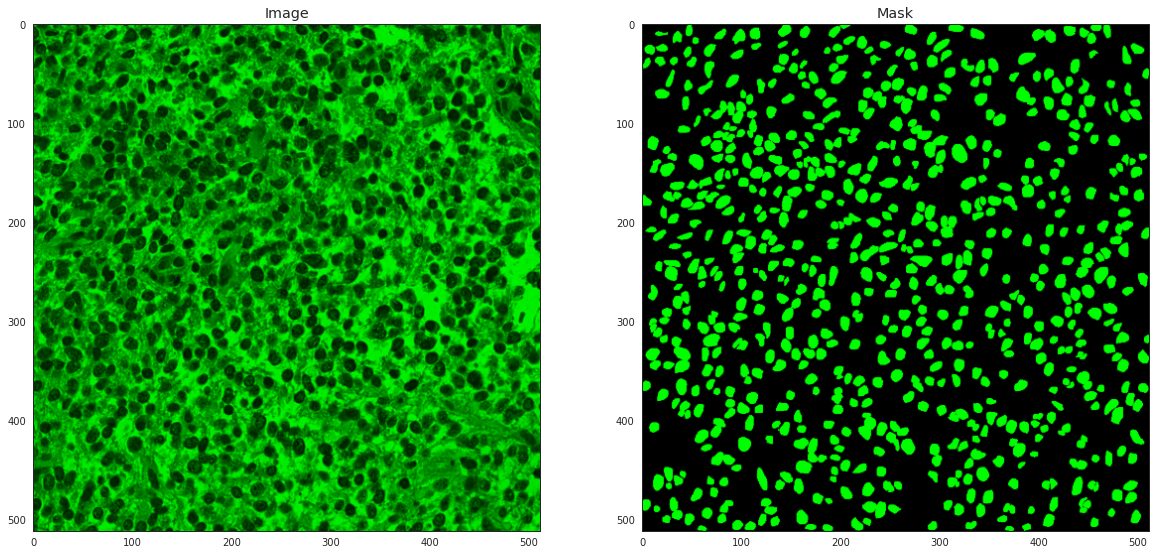

In [65]:
# Visualize any randome image along with the mask
ix = random.randint(0, len(X_train)-1)
has_mask = y_train[ix].max() > 0 # indicator
print(has_mask)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (20, 15))

ax1.imshow(X_train[ix],cmap='Accent')
ax1.set_title('Image')
ax2.imshow(y_train[ix].squeeze(),interpolation = 'bilinear')
ax2.set_title('Mask')

<h1> Performance Metrices </h1>

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred = K.cast(y_pred, 'float32')
    y_pred_f = K.cast(K.greater(K.flatten(y_pred), 0.5), 'float32')
    intersection = y_true_f * y_pred_f
    score = 2. * K.sum(intersection) / (K.sum(y_true_f) + K.sum(y_pred_f))
    return score

def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1. - score

def _recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def _precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = _precision(y_true, y_pred)
    recall = _recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

<h1> Define Cosine Anneal Learning Rate Scheduler </h1>

In [0]:
class SnapshotCallbackBuilder:
    def __init__(self, nb_epochs, nb_snapshots, init_lr=0.1):
        self.T = nb_epochs
        self.M = nb_snapshots 
        self.alpha_zero = init_lr

    def get_callbacks(self, model_prefix='Model'):

        callback_list = [
            #callbacks.ModelCheckpoint("./keras.model",monitor='val_loss', 
            #                       mode = 'min', save_best_only=True, verbose=1),
            callbacks.ModelCheckpoint('model-monuseg-Unet_plus_plus.h5',
                            verbose=1, save_best_only=True, save_weights_only=True),
            #swa,
            callbacks.LearningRateScheduler(schedule=self._cosine_anneal_schedule)
        ]

        return callback_list

    def _cosine_anneal_schedule(self, t):
        cos_inner = np.pi * (t % (self.T // self.M))  # t - 1 is used when t has 1-based indexing.
        cos_inner /= self.T // self.M
        cos_out = np.cos(cos_inner) + 1
        return float(self.alpha_zero / 2 * cos_out)

<h1> Defining Nested UNet with EfficientNet as backbone </h1>

In [0]:
#useful model blocks
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    if activation == True:
        x = ReLU()(x)
        #x = LeakyReLU(alpha=0.1)(x)
    return x

def residual_block(blockInput, num_filters=16):
    #x = LeakyReLU(alpha=0.1)(blockInput)
    x = ReLU()(blockInput)
    x = BatchNormalization()(x)
    blockInput = BatchNormalization()(blockInput)
    x = convolution_block(x, num_filters, (3,3) )
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    return x

In [0]:
#Defining uefficientNet model
from efficientnet import EfficientNetB4

def UEfficientNet(input_shape=(None, None, 3),dropout_rate=0.1):

    backbone = EfficientNetB4(weights='imagenet',
                            include_top=False,
                            input_shape=input_shape)
    input = backbone.input
    start_neurons = 8

    conv4 = backbone.layers[342].output
    #conv4 = LeakyReLU(alpha=0.1)(conv4)
    conv4 = ReLU()(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(dropout_rate)(pool4)
    
     # Middle
    convm = Conv2D(start_neurons * 32, (3, 3), activation=None, padding="same",name='conv_middle')(pool4)
    convm = residual_block(convm,start_neurons * 32)
    convm = residual_block(convm,start_neurons * 32)
    #convm = LeakyReLU(alpha=0.1)(convm)
    convm = ReLU()(convm)

    deconv4 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(convm)
    deconv4_up1 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4)
    deconv4_up2 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4_up1)
    deconv4_up3 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4_up2)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(dropout_rate)(uconv4) 
    
    uconv4 = Conv2D(start_neurons * 16, (3, 3), activation=None, padding="same")(uconv4)
    uconv4 = residual_block(uconv4,start_neurons * 16)
#     uconv4 = residual_block(uconv4,start_neurons * 16)
    #uconv4 = LeakyReLU(alpha=0.1)(uconv4)  #conv1_2
    uconv4 = ReLU()(uconv4)
    
    deconv3 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(uconv4)
    deconv3_up1 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(deconv3)
    deconv3_up2 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(deconv3_up1)
    conv3 = backbone.layers[154].output
    uconv3 = concatenate([deconv3,deconv4_up1, conv3])    
    uconv3 = Dropout(dropout_rate)(uconv3)
    
    uconv3 = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = residual_block(uconv3,start_neurons * 8)
#     uconv3 = residual_block(uconv3,start_neurons * 8)
    #uconv3 = LeakyReLU(alpha=0.1)(uconv3)
    uconv3 = ReLU()(uconv3)


    deconv2 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv3)
    deconv2_up1 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(deconv2)
    conv2 = backbone.layers[92].output
    uconv2 = concatenate([deconv2,deconv3_up1,deconv4_up2, conv2])
        
    uconv2 = Dropout(0.1)(uconv2)
    uconv2 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = residual_block(uconv2,start_neurons * 4)
#     uconv2 = residual_block(uconv2,start_neurons * 4)
    #uconv2 = LeakyReLU(alpha=0.1)(uconv2)
    uconv2 = ReLU()(uconv2)


    deconv1 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv2)
    conv1 = backbone.layers[30].output
    uconv1 = concatenate([deconv1,deconv2_up1,deconv3_up2,deconv4_up3, conv1])
    
    uconv1 = Dropout(0.1)(uconv1)
    uconv1 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = residual_block(uconv1,start_neurons * 2)
#     uconv1 = residual_block(uconv1,start_neurons * 2)
    #uconv1 = LeakyReLU(alpha=0.1)(uconv1)
    uconv1 = ReLU()(uconv1)

    uconv0 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv1)   
    uconv0 = Dropout(0.1)(uconv0)
    uconv0 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv0)
    uconv0 = residual_block(uconv0,start_neurons * 1)
#     uconv0 = residual_block(uconv0,start_neurons * 1)
    #uconv0 = LeakyReLU(alpha=0.1)(uconv0)
    uconv0 = ReLU()(uconv0)

    uconv0 = Dropout(dropout_rate/2)(uconv0)
    output_layer = Conv2D(3, (1,1), padding="same", activation="sigmoid")(uconv0)    
    
    model = Model(input, output_layer)
    model.name = 'u-xception'

    return model

In [0]:
img_size = 512
model = UEfficientNet(input_shape=(img_size,img_size,3),dropout_rate=0.1)

In [71]:
model.summary()

Model: "u-xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_593 (Conv2D)             (None, 256, 256, 48) 1296        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_497 (BatchN (None, 256, 256, 48) 192         conv2d_593[0][0]                 
__________________________________________________________________________________________________
swish_385 (Swish)               (None, 256, 256, 48) 0           batch_normalization_497[0][0]    
_________________________________________________________________________________________

<h1> Compile and Train </h1>

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',dice_coef,f1_score])

In [74]:
epochs = 70
snapshot = SnapshotCallbackBuilder(nb_epochs=epochs,nb_snapshots=1,init_lr=1e-3)
#swa = SWA('./keras_swa.model',67)
history = model.fit(X_train,y_train,batch_size=4,
                            epochs=epochs,verbose=2,
                            callbacks=snapshot.get_callbacks(),
                            validation_data=(X_test,y_test))

Train on 30 samples, validate on 14 samples
Epoch 1/70
 - 13s - loss: 0.8662 - acc: 0.3593 - dice_coef: 0.1889 - f1_score: 0.1762 - val_loss: 1.0240 - val_acc: 0.4958 - val_dice_coef: 0.1955 - val_f1_score: 0.1903

Epoch 00001: val_loss improved from inf to 1.02401, saving model to model-monuseg-Unet_plus_plus.h5
Epoch 2/70
 - 5s - loss: 0.7246 - acc: 0.4476 - dice_coef: 0.2088 - f1_score: 0.1930 - val_loss: 0.6884 - val_acc: 0.6210 - val_dice_coef: 0.2361 - val_f1_score: 0.2270

Epoch 00002: val_loss improved from 1.02401 to 0.68844, saving model to model-monuseg-Unet_plus_plus.h5
Epoch 3/70
 - 5s - loss: 0.6391 - acc: 0.5747 - dice_coef: 0.2553 - f1_score: 0.2375 - val_loss: 0.7222 - val_acc: 0.6867 - val_dice_coef: 0.3113 - val_f1_score: 0.3065

Epoch 00003: val_loss did not improve from 0.68844
Epoch 4/70
 - 5s - loss: 0.5790 - acc: 0.6517 - dice_coef: 0.3126 - f1_score: 0.2946 - val_loss: 0.7939 - val_acc: 0.7054 - val_dice_coef: 0.3304 - val_f1_score: 0.3263

Epoch 00004: val_los

<h1> Performance Graphs </h1>

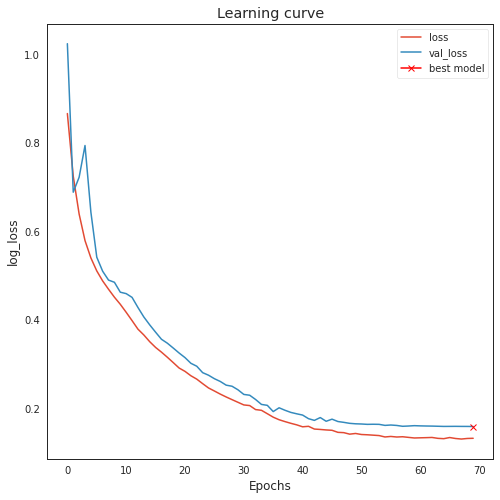

In [75]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

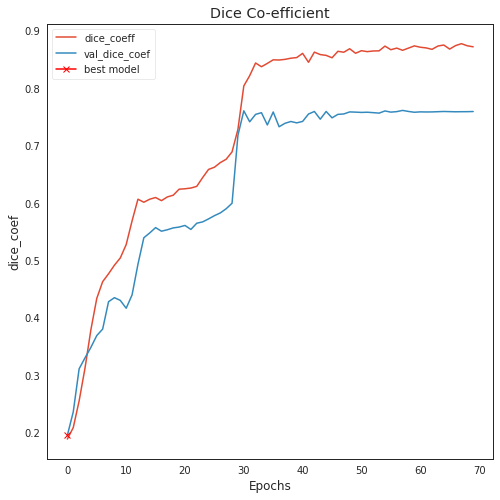

In [76]:
plt.figure(figsize=(8, 8))
plt.title("Dice Co-efficient")
plt.plot(history.history['dice_coef'], label="dice_coeff")
plt.plot(history.history["val_dice_coef"], label="val_dice_coef")
plt.plot( np.argmin(history.history["val_dice_coef"]), np.min(history.history["val_dice_coef"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("dice_coef")
plt.legend();

In [78]:
# Evaluate on validation set (this must be equals to the best log_loss)
eval = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss: "+ str(eval[0]))
print("Test Accuracy: "+ str(eval[1]))
print("Dice Co-efficient: "+ str(eval[2]))
print("F1-score "+ str(eval[3]))

14/14 [==============================] - 0s 28ms/step
Test Loss: 0.15891806781291962
Test Accuracy: 0.9142027497291565
Dice Co-efficient: 0.7618255615234375
F1-score 0.7453052997589111


In [80]:
# Predict on train, val and test
preds_test = model.predict(X_test, verbose=1)

14/14 [==============================] - 0s 27ms/step


In [0]:
# Threshold predictions
preds_test_t = (preds_test > 0.5).astype(np.uint8)

<h1> Inference / Visual Predictions </h1>

In [0]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 1], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix, ..., 1].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('original')

    ax[1].imshow(y[ix, ..., 1].squeeze())
    ax[1].set_title('Masks')

    ax[2].imshow(preds[ix, ..., 1].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix, ..., 1].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Predicted')
    
    ax[3].imshow(binary_preds[ix, ..., 1].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix, ..., 1].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Predicted binary');

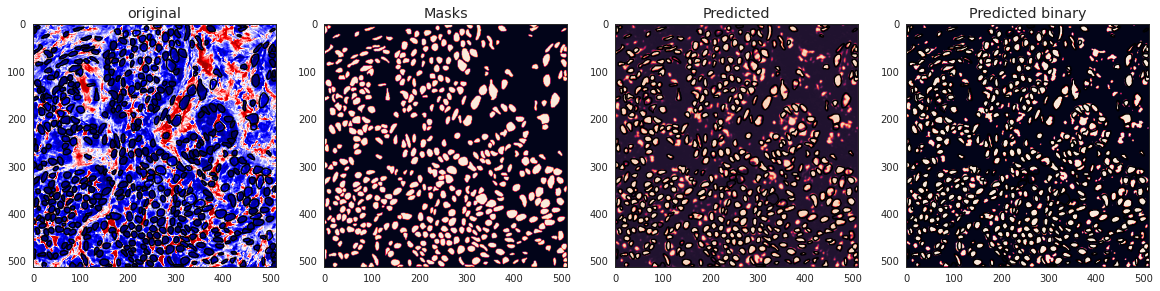

In [83]:
#prediction on test set
# Check if valid data looks all right
plot_sample(X_test, y_test, preds_test, preds_test_t, ix=12)

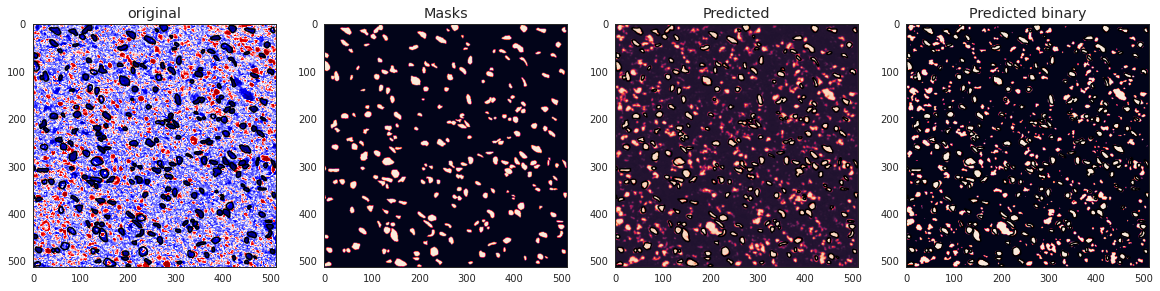

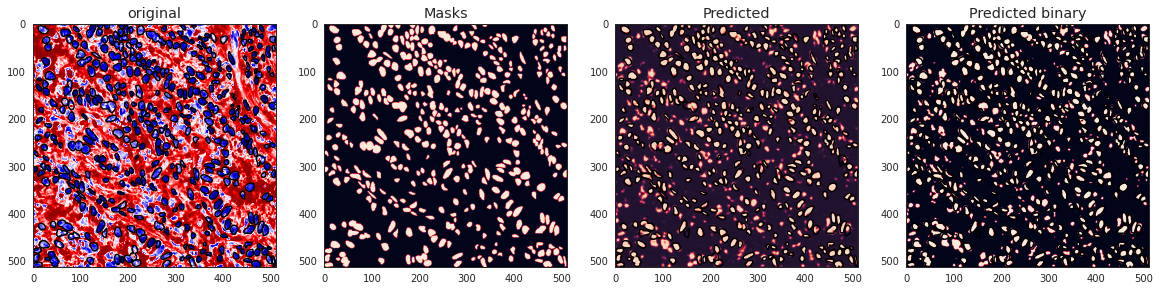

In [84]:
#prediction on test set
# Check if valid data looks all right
plot_sample(X_test, y_test, preds_test, preds_test_t, ix=8)
#prediction on test set
# Check if valid data looks all right
plot_sample(X_test, y_test, preds_test, preds_test_t, ix=9)